In [1]:
# import libraries
import numpy as np
import pandas as pd
import swat as sw
import os
#os.environ['CUDA_VISIBLE_DEVICES']='1'
os.environ['CUDA_VISIBLE_DEVICES']='0'
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load Credit Card data
df = pd.read_csv('../gan-testing/data/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df = df.drop(['Time', 'Class'], axis=1)
df.shape

(284807, 29)

In [5]:
orig_X = df.drop(['Amount'], axis=1)
orig_y = df.loc[:,"Amount"]

In [6]:
from sklearn.model_selection import train_test_split

orig_X_train, orig_X_test, orig_y_train, orig_y_test = train_test_split(orig_X, orig_y, test_size=0.3, random_state=123)



In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression().fit(orig_X_train, orig_y_train)
predict_train=reg.predict(orig_X_train)
r2_train=r2_score(orig_y_train, predict_train)
print('\R2_score on train dataset : ', r2_train)

\R2_score on train dataset :  0.9109251064569308


In [8]:
# predict the target on the test dataset
predict_test = reg.predict(orig_X_test)
#print('\nTarget on test data',predict_test) 
 
r2_test=r2_score(orig_y_test, predict_test)
print('\R2_score on test dataset : ', r2_test)

\R2_score on test dataset :  0.9317383074771152


In [9]:
cc_GAN = pd.concat([orig_X_train, orig_y_train],axis=1)
cc_GAN.shape

(199364, 29)

In [10]:
cc_GAN.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [11]:
s = sw.CAS('dl2073.clstr.rnd.sas.com',33789)

In [12]:
s.loadactionset('generativeAdversarialNet')

NOTE: Added action set 'generativeAdversarialNet'.


[actionset]

 'generativeAdversarialNet'

+ Elapsed: 0.504s, user: 2.16s, sys: 2.33s, mem: 0.222mb

In [13]:
s.upload(cc_GAN, casout=dict(name='cc_data', replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table CC_DATA in caslib CASUSER(alphel).
NOTE: The table CC_DATA has been created in caslib CASUSER(alphel) from binary data uploaded to Cloud Analytic Services.


[caslib]

 'CASUSER(alphel)'

[tableName]

 'CC_DATA'

[casTable]

 CASTable('CC_DATA', caslib='CASUSER(alphel)')

+ Elapsed: 2.99s, user: 3.44s, sys: 0.706s, mem: 130mb

In [14]:
cen = pd.read_csv("../gan-testing/data/cc_centroids.csv")
s.upload(cen, casout=dict(name='cen', replace=True))
cen

NOTE: Cloud Analytic Services made the uploaded file available as table CEN in caslib CASUSER(alphel).
NOTE: The table CEN has been created in caslib CASUSER(alphel) from binary data uploaded to Cloud Analytic Services.


,VarName,Centroid_i,weight,Mean,Std
0,Amount,1,0.05646,74.05,25.22
1,Amount,2,0.05167,79.17,28.17
2,Amount,3,0.11023,32.76,12.24
3,Amount,4,0.08512,43.38,16.88
4,Amount,5,0.25107,2.56,2.39
...,...,...,...,...,...
201,V28,4,0.24767,-0.01,0.04
202,V28,5,0.12603,0.08,0.12
203,V28,6,0.12104,0.06,0.11
204,V28,7,0.00903,-0.19,2.83


In [49]:
results = s.tabularGanTrain(
table = {"name":"cc_data"},
    centroidsTable= "cen",
    gpu = 1,
    optimizerAe ={"method":'ADAM',"numEpochs":300},
    optimizerGan ={"method":'ADAM',"numEpochs":300},
    seed = 12345,
    scoreSeed = 1234,
    numSamples =300000,
    saveState ={"name":"cpctStore", "replace":True},
    casOut = {"name":"out", "replace":True}
)
results

NOTE: Using device: GPU 0.
NOTE: Epoch i=1, ae_loss=  0.1391.
NOTE: Epoch i=2, ae_loss=  0.1334.
NOTE: Epoch i=3, ae_loss=  0.1281.
NOTE: Epoch i=4, ae_loss=  0.1250.
NOTE: Epoch i=5, ae_loss=  0.1250.
NOTE: Epoch i=6, ae_loss=  0.1213.
NOTE: Epoch i=7, ae_loss=  0.1202.
NOTE: Epoch i=8, ae_loss=  0.1183.
NOTE: Epoch i=9, ae_loss=  0.1171.
NOTE: Epoch i=10, ae_loss=  0.1160.
NOTE: Epoch i=11, ae_loss=  0.1126.
NOTE: Epoch i=12, ae_loss=  0.1110.
NOTE: Epoch i=13, ae_loss=  0.1063.
NOTE: Epoch i=14, ae_loss=  0.1040.
NOTE: Epoch i=15, ae_loss=  0.1014.
NOTE: Epoch i=16, ae_loss=  0.0982.
NOTE: Epoch i=17, ae_loss=  0.0963.
NOTE: Epoch i=18, ae_loss=  0.0943.
NOTE: Epoch i=19, ae_loss=  0.0918.
NOTE: Epoch i=20, ae_loss=  0.0895.
NOTE: Epoch i=21, ae_loss=  0.0903.
NOTE: Epoch i=22, ae_loss=  0.0866.
NOTE: Epoch i=23, ae_loss=  0.0852.
NOTE: Epoch i=24, ae_loss=  0.0829.
NOTE: Epoch i=25, ae_loss=  0.0823.
NOTE: Epoch i=26, ae_loss=  0.0813.
NOTE: Epoch i=27, ae_loss=  0.0809.
NOTE: Epoc

NOTE: Epoch i=227, ae_loss=  0.0388.
NOTE: Epoch i=228, ae_loss=  0.0390.
NOTE: Epoch i=229, ae_loss=  0.0385.
NOTE: Epoch i=230, ae_loss=  0.0380.
NOTE: Epoch i=231, ae_loss=  0.0393.
NOTE: Epoch i=232, ae_loss=  0.0385.
NOTE: Epoch i=233, ae_loss=  0.0385.
NOTE: Epoch i=234, ae_loss=  0.0382.
NOTE: Epoch i=235, ae_loss=  0.0384.
NOTE: Epoch i=236, ae_loss=  0.0389.
NOTE: Epoch i=237, ae_loss=  0.0381.
NOTE: Epoch i=238, ae_loss=  0.0383.
NOTE: Epoch i=239, ae_loss=  0.0387.
NOTE: Epoch i=240, ae_loss=  0.0375.
NOTE: Epoch i=241, ae_loss=  0.0382.
NOTE: Epoch i=242, ae_loss=  0.0378.
NOTE: Epoch i=243, ae_loss=  0.0366.
NOTE: Epoch i=244, ae_loss=  0.0386.
NOTE: Epoch i=245, ae_loss=  0.0385.
NOTE: Epoch i=246, ae_loss=  0.0373.
NOTE: Epoch i=247, ae_loss=  0.0372.
NOTE: Epoch i=248, ae_loss=  0.0392.
NOTE: Epoch i=249, ae_loss=  0.0387.
NOTE: Epoch i=250, ae_loss=  0.0379.
NOTE: Epoch i=251, ae_loss=  0.0385.
NOTE: Epoch i=252, ae_loss=  0.0370.
NOTE: Epoch i=253, ae_loss=  0.0377.
N

NOTE: Epoch i=108, g_loss=  0.9461, d_loss= -0.4092.
NOTE: Epoch i=109, g_loss=  1.0145, d_loss= -0.3322.
NOTE: Epoch i=110, g_loss=  0.6914, d_loss= -0.5946.
NOTE: Epoch i=111, g_loss=  1.0221, d_loss= -0.4472.
NOTE: Epoch i=112, g_loss=  0.9298, d_loss= -0.2104.
NOTE: Epoch i=113, g_loss=  0.7308, d_loss= -0.3668.
NOTE: Epoch i=114, g_loss=  1.0462, d_loss= -0.4668.
NOTE: Epoch i=115, g_loss=  0.8875, d_loss= -0.3786.
NOTE: Epoch i=116, g_loss=  0.9889, d_loss= -0.7370.
NOTE: Epoch i=117, g_loss=  1.1415, d_loss= -0.2194.
NOTE: Epoch i=118, g_loss=  1.1728, d_loss= -0.1504.
NOTE: Epoch i=119, g_loss=  0.9891, d_loss= -0.2631.
NOTE: Epoch i=120, g_loss=  0.8742, d_loss= -0.2560.
NOTE: Epoch i=121, g_loss=  1.0960, d_loss= -0.3152.
NOTE: Epoch i=122, g_loss=  1.0500, d_loss= -0.4863.
NOTE: Epoch i=123, g_loss=  0.8630, d_loss= -0.3423.
NOTE: Epoch i=124, g_loss=  1.0001, d_loss= -0.2337.
NOTE: Epoch i=125, g_loss=  0.8056, d_loss= -0.3461.
NOTE: Epoch i=126, g_loss=  1.0907, d_loss= -0

NOTE: Epoch i=268, g_loss=  0.7877, d_loss= -0.3923.
NOTE: Epoch i=269, g_loss=  0.7634, d_loss= -0.2380.
NOTE: Epoch i=270, g_loss=  0.8763, d_loss= -0.2629.
NOTE: Epoch i=271, g_loss=  0.8964, d_loss= -0.5514.
NOTE: Epoch i=272, g_loss=  1.0641, d_loss= -0.4184.
NOTE: Epoch i=273, g_loss=  0.8470, d_loss= -0.3855.
NOTE: Epoch i=274, g_loss=  0.9102, d_loss= -0.2571.
NOTE: Epoch i=275, g_loss=  0.9331, d_loss= -0.6300.
NOTE: Epoch i=276, g_loss=  0.8541, d_loss= -0.1943.
NOTE: Epoch i=277, g_loss=  0.8149, d_loss= -0.6056.
NOTE: Epoch i=278, g_loss=  0.6681, d_loss= -0.4575.
NOTE: Epoch i=279, g_loss=  0.9522, d_loss= -0.2344.
NOTE: Epoch i=280, g_loss=  1.0545, d_loss= -0.6081.
NOTE: Epoch i=281, g_loss=  0.9117, d_loss= -0.2916.
NOTE: Epoch i=282, g_loss=  0.9757, d_loss= -0.1303.
NOTE: Epoch i=283, g_loss=  1.1593, d_loss= -0.3854.
NOTE: Epoch i=284, g_loss=  0.8309, d_loss= -0.3963.
NOTE: Epoch i=285, g_loss=  0.9503, d_loss= -0.2288.
NOTE: Epoch i=286, g_loss=  1.0061, d_loss= -0

,EpochNumber,AutoencoderLoss,GeneratorLoss,DiscriminatorLoss
0,1,0.139102,NaN,NaN
1,2,0.133378,NaN,NaN
2,3,0.128101,NaN,NaN
3,4,0.125032,NaN,NaN
4,5,0.124965,NaN,NaN
...,...,...,...,...
595,296,NaN,0.849706,-0.680261
596,297,NaN,1.074212,-0.320303
597,298,NaN,0.794919,-0.314960
598,299,NaN,0.943709,-0.445655


In [50]:
samples = s.fetch('out', to=400000, maxrows=400000)['Fetch']
gloss = results.IterHistory['GeneratorLoss'].dropna().reset_index(drop=True)
dloss = results.IterHistory['DiscriminatorLoss'].dropna().reset_index(drop=True)

Text(0.5, 1.0, 'Losses for CPCTGAN on CreditCard data')

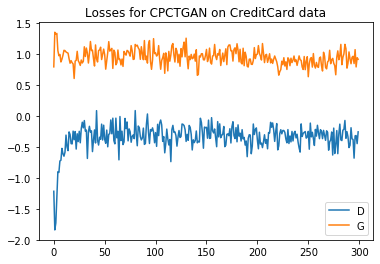

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(dloss)
plt.plot(gloss)
plt.legend(['D', 'G'])
plt.title('Losses for CPCTGAN on CreditCard data')
#plt.savefig('Original-CTGAN-Adult')

In [52]:
fake_X = samples.drop(["Amount"],axis=1)
fake_y = samples.loc[:,"Amount"]

In [53]:
# check the training data shape to agree with the original data (# of features/cols)
print(fake_X.shape)
print(fake_y.shape)
print(orig_X_test.shape)

(300000, 28)
(300000,)
(85443, 28)


In [54]:
reg = LinearRegression().fit(fake_X, fake_y)
predict_train=reg.predict(fake_X)
r2_train=r2_score(fake_y, predict_train)
print('\R2_score on train dataset : ', r2_train)

\R2_score on train dataset :  0.10797218955896903


In [55]:
# predict the target on the test dataset
predict_test = reg.predict(orig_X_test)
#print('\nTarget on test data',predict_test) 
 
r2_test=r2_score(orig_y_test, predict_test)
print('\R2_score on test dataset : ', r2_test)

\R2_score on test dataset :  0.14773610422813166


### Train CTGAN on the same data

In [39]:
from ctgan import CTGANSynthesizer

In [44]:
# train CTGAN and generate fake data
# from synthesizer import CTGANSynthesizer
ctgan = CTGANSynthesizer(verbose=True)
ctgan.fit(cc_GAN, epochs=300)

Epoch 1, Loss G:  10.1397,Loss D: -29.9089
Epoch 2, Loss G:  14.7937,Loss D: -83.2423
Epoch 3, Loss G:  19.3291,Loss D: -164.3260
Epoch 4, Loss G:  23.8256,Loss D: -263.0912
Epoch 5, Loss G:  27.7296,Loss D: -415.3143
Epoch 6, Loss G:  32.6189,Loss D: -526.2577
Epoch 7, Loss G:  36.3843,Loss D: -689.7050
Epoch 8, Loss G:  40.0467,Loss D: -831.0113
Epoch 9, Loss G:  44.6874,Loss D: -1017.7595
Epoch 10, Loss G:  47.3032,Loss D: -1218.7024
Epoch 11, Loss G:  50.9409,Loss D: -1412.9937
Epoch 12, Loss G:  51.7371,Loss D: -1621.9845
Epoch 13, Loss G:  57.8070,Loss D: -1794.4327
Epoch 14, Loss G:  59.9249,Loss D: -1967.3234
Epoch 15, Loss G:  62.8084,Loss D: -2086.9167
Epoch 16, Loss G:  63.9436,Loss D: -2393.0789
Epoch 17, Loss G:  67.6362,Loss D: -2547.1797
Epoch 18, Loss G:  68.0923,Loss D: -2566.8606
Epoch 19, Loss G:  70.7952,Loss D: -2844.3838
Epoch 20, Loss G:  73.0399,Loss D: -2949.3467
Epoch 21, Loss G:  71.5208,Loss D: -2953.7708
Epoch 22, Loss G:  73.0716,Loss D: -3117.1821
Epoch 2

Epoch 184, Loss G:  6.0554,Loss D: -7.5690
Epoch 185, Loss G:  5.7420,Loss D: -7.0375
Epoch 186, Loss G:  5.9606,Loss D: -7.4144
Epoch 187, Loss G:  5.7684,Loss D: -6.7946
Epoch 188, Loss G:  5.6791,Loss D: -6.3540
Epoch 189, Loss G:  5.6855,Loss D: -6.8653
Epoch 190, Loss G:  5.7551,Loss D: -6.7940
Epoch 191, Loss G:  5.8035,Loss D: -6.9704
Epoch 192, Loss G:  5.4543,Loss D: -5.9767
Epoch 193, Loss G:  5.6559,Loss D: -6.2664
Epoch 194, Loss G:  5.5449,Loss D: -6.9710
Epoch 195, Loss G:  5.6095,Loss D: -6.2608
Epoch 196, Loss G:  5.4496,Loss D: -5.9196
Epoch 197, Loss G:  5.4982,Loss D: -6.1658
Epoch 198, Loss G:  5.4057,Loss D: -6.1816
Epoch 199, Loss G:  5.4854,Loss D: -5.7794
Epoch 200, Loss G:  5.5046,Loss D: -5.8720
Epoch 201, Loss G:  5.2928,Loss D: -6.3033
Epoch 202, Loss G:  5.2786,Loss D: -5.6454
Epoch 203, Loss G:  5.2639,Loss D: -5.2602
Epoch 204, Loss G:  5.3528,Loss D: -5.3286
Epoch 205, Loss G:  5.2291,Loss D: -5.6470
Epoch 206, Loss G:  5.2079,Loss D: -5.1751
Epoch 207, 

In [45]:
#adult_data_all.head()
samples = ctgan.sample(300000)
fake_X = samples.drop(["Amount"],axis=1)
fake_X, fake_y = fake_X,samples.loc[:,"Amount"]

In [46]:
# check the training data shape to agree with the original data (# of features/cols)
print(fake_X.shape)
print(fake_y.shape)
print(orig_X_test.shape)

(300000, 28)
(300000,)
(85443, 28)


In [47]:
reg = LinearRegression().fit(fake_X, fake_y)
predict_train=reg.predict(fake_X)
r2_train=r2_score(fake_y, predict_train)
print('\R2_score on train dataset : ', r2_train)

\R2_score on train dataset :  0.0013678218651916874


In [48]:
# predict the target on the test dataset
predict_test = reg.predict(orig_X_test)
#print('\nTarget on test data',predict_test) 
 
r2_test=r2_score(orig_y_test, predict_test)
print('\R2_score on test dataset : ', r2_test)

\R2_score on test dataset :  -0.8708630163471054
